<a href="https://colab.research.google.com/github/vineeta07/mlproject_dogvscatimageclassification/blob/main/dogvscatsimageclassificationMLmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog vs Cat Image Classification model

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!pip install kaggle

In [3]:
import os
import shutil
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

source = 'kaggle.json'
destination = os.path.expanduser('~/.kaggle/kaggle.json')
shutil.copy(source, destination)
os.chmod(destination, 0o600)

print("kaggle.json moved and permissions set successfully.")

kaggle.json moved and permissions set successfully.


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:07<00:00, 206MB/s]
100% 1.06G/1.06G [00:07<00:00, 145MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, BatchNormalization,Dropout

Model Training

In [37]:
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [38]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3),padding ='valid', activation='relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 ,padding='valid'))

model.add(Conv2D(64 , kernel_size=(3,3),padding ='valid', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 ,padding='valid'))

model.add(Conv2D(128 , kernel_size=(3,3),padding ='valid', activation='relu' ,))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 ,padding='valid'))

model.add(Flatten())

model.add(Dense(128 , activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

Model testing

In [41]:
history =model.fit(train_ds , epochs=10 ,validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 144ms/step - accuracy: 0.5681 - loss: 2.3261 - val_accuracy: 0.6751 - val_loss: 0.5885
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 142ms/step - accuracy: 0.6969 - loss: 0.5769 - val_accuracy: 0.7581 - val_loss: 0.4990
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.7639 - loss: 0.4880 - val_accuracy: 0.8173 - val_loss: 0.4125
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.8122 - loss: 0.4167 - val_accuracy: 0.8285 - val_loss: 0.3960
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 117ms/step - accuracy: 0.8397 - loss: 0.3688 - val_accuracy: 0.6355 - val_loss: 0.6432
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 142ms/step - accuracy: 0.8749 - loss: 0.3005 - val_accuracy: 0.8342 - val_loss: 0.3696
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 115ms/step - accuracy: 0.9144 - loss: 0.2103 - val_accuracy: 0.9064 - val_loss: 0.2299
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.9403 - loss:

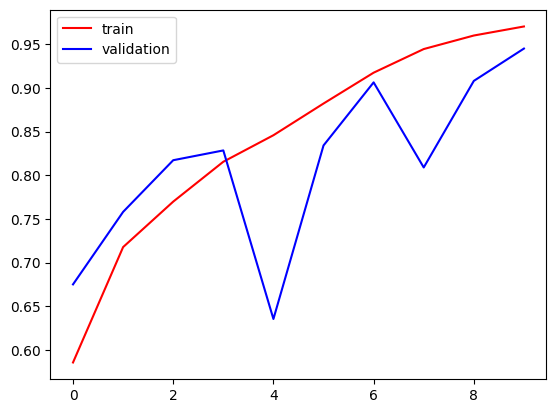

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color='red' , label = 'train')
plt.plot(history.history['val_accuracy'] , color='blue' , label ='validation')
plt.legend()
plt.show()

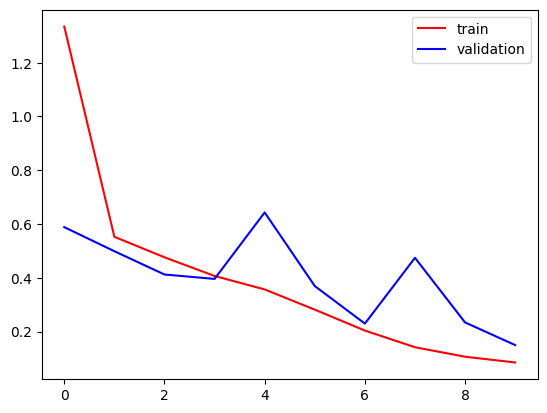

In [43]:
plt.plot(history.history['loss'] , color='red' , label='train')
plt.plot(history.history['val_loss'] , color='blue' , label = 'validation')
plt.legend()
plt.show()

In [44]:
import cv2

In [52]:
test_img=cv2.imread('/content/cat.jpg')

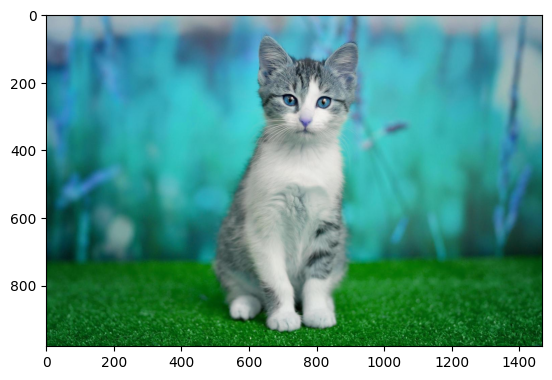

In [53]:
plt.imshow(test_img)

In [54]:
test_img.shape

(980, 1468, 3)

In [55]:
test_img= cv2.resize(test_img,(256,256))

In [56]:
test_input = test_img.reshape((1,256,256,3))

Output

In [59]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.08322541]], dtype=float32)

In [60]:
prediction = model.predict(test_input)
if prediction > 0.5:
  print("The image is a dog.")
else:
  print("The image is a cat.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The image is a cat.
